In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from colorspacious import cspace_converter
from collections import OrderedDict
from importmarvel import create_marvel_graph

In [6]:
G=nx.Graph() # marvel graph

In [7]:
#mar=open('C:\\Users\\Ines\\Desktop\\porgat.txt','r')

In [3]:
#for i, line in enumerate(mar):
#	if i>0 and i<19429:
#		boo=False
#		lab=''
#		for ch in line.rstrip():
#			if not boo:
#				if ch==' ':
#					boo=True				
#			else:
#				lab+=ch
#		lab=lab.replace('\"','')
#		if i<=6486:
#			G.add_node(i,label=lab,ntype='character')
#	
#		else:
#			G.add_node(i,label=lab,ntype='book')
#		


#	elif i>19429: #line 19429 indicates that the following lines will have the edges
#		m=line.rstrip().split()
#		k=m.pop(0)
#		while len(m)>0:
#			l=m.pop(0)
#			G.add_edge(int(k),int(l))

G = create_marvel_graph('porgat.txt')

In [4]:
characterG=nx.projected_graph(G,list(range(1, 6486+1)) , multigraph=False) #characters "social" network
bookG=nx.Graph()#books connected by a same character

In [7]:
'''Bipartite Graph'''
Gdegrees = nx.degree_centrality(G)
Glabel=nx.get_node_attributes(G,'label')
Gntype=nx.get_node_attributes(G,'ntype')

In [8]:
#Degree centraility
print(max(Gdegrees.items(), key = lambda x:x[1]))
print("Node with highest degree centrality: "+Glabel[5306]+"\nType: "+Gntype[5306])

(5306, 0.08364647140577547)
Node with highest degree centrality: 
Type: character


In [9]:
'''Character Network'''
cdegrees = nx.degree_centrality(characterG)
clabel=nx.get_node_attributes(characterG,'label')

In [10]:
print("CHARACTERS")
print("number of nodes: "+str(characterG.number_of_nodes()))
print("number of edges: "+str(characterG.number_of_edges()))

CHARACTERS
number of nodes: 6486
number of edges: 168267


In [14]:
cliquelist=list(nx.find_cliques(characterG))

In [26]:
cliquen=nx.graph_clique_number(characterG)

In [27]:
print("maximum clique: "+str(cliquen))

maximum clique: 111


In [28]:
print(nx.is_connected(characterG))

False


In [45]:
nx.number_connected_components(characterG)

23

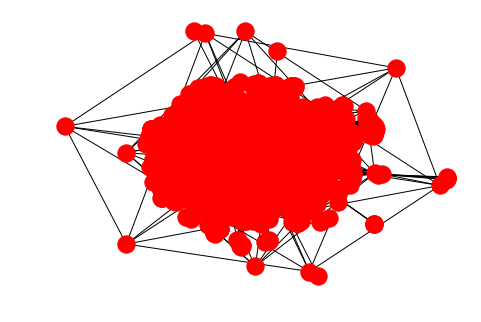

In [46]:
connectlist=list(nx.connected_component_subgraphs(characterG))
i=0
while i<23:
    nlist=connectlist[i]
    nx.nx.draw(nx.subgraph(characterG, nlist))
    i+=1
    

KeyError: 95

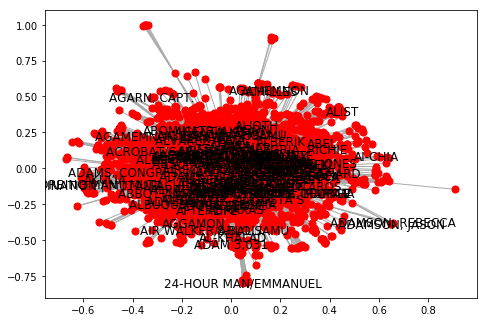

In [87]:
nx.draw(nx.subgraph(characterG, connectlist[0]), cmap="YlGnBu", edge_color='darkgray', labels=nx.get_node_attributes(characterG, 'label'), node_size=50)

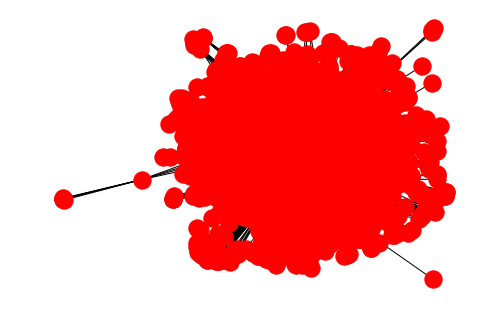

In [48]:
nx.nx.draw(nx.subgraph(characterG, connectlist[1]))